In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

import hvplot.pandas
%matplotlib inline
import matplotlib.pyplot as plt
import plotly.express as px
import panel as pn
pn.extension('plotly')
import os
from MCForecastTools import MCSimulation
from dotenv import load_dotenv
import warnings
warnings.filterwarnings('ignore')

ModuleNotFoundError: No module named 'hvplot'

In [ ]:
print(pd.__version__)

In [2]:
import pickle
meme_stock_df = pickle.load(open('meme_close.pkl', 'rb'))

meme_stock_df.head()

,AMC,GME,SPY
2021-01-04,2.0150,17.2400,368.85
2021-01-05,1.9853,17.3600,371.32
2021-01-06,2.0100,18.3900,373.53
2021-01-07,2.0500,18.1200,379.06
2021-01-08,2.1400,17.6899,381.24


In [3]:
meme_spy_returns = meme_stock_df.pct_change()
meme_spy_returns.head()

,AMC,GME,SPY
2021-01-04,NaN,NaN,NaN
2021-01-05,-0.014739,0.006961,0.006696
2021-01-06,0.012441,0.059332,0.005952
2021-01-07,0.019900,-0.014682,0.014805
2021-01-08,0.043902,-0.023736,0.005751


In [4]:
meme_spy_returns.dropna(inplace=True)
meme_spy_returns.head()

,AMC,GME,SPY
2021-01-05,-0.014739,0.006961,0.006696
2021-01-06,0.012441,0.059332,0.005952
2021-01-07,0.019900,-0.014682,0.014805
2021-01-08,0.043902,-0.023736,0.005751
2021-01-11,0.028037,0.126632,-0.006558


Text(0.5, 1.0, 'Daily Returns AMC GME S&P 500')

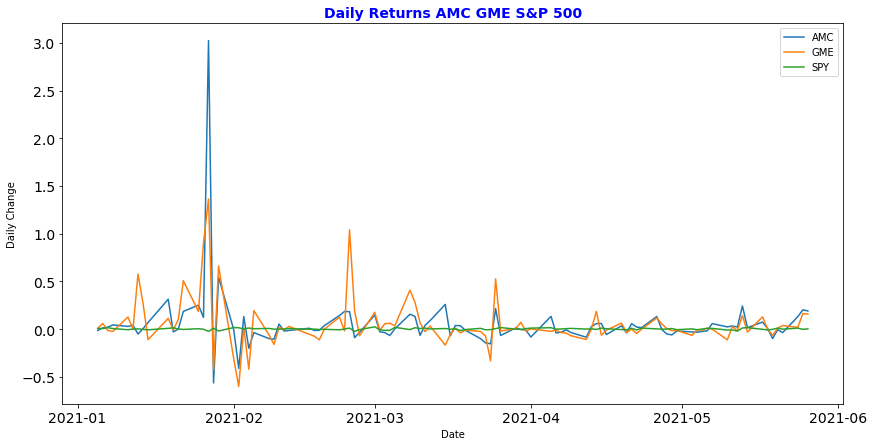

In [5]:
meme_stock_plot=meme_spy_returns.plot(title='AMC and GME vs S&P 500',ylabel="Daily Change",xlabel="Date", fontsize=14,figsize=(14,7))

meme_stock_plot.set_title('Daily Returns AMC GME S&P 500', fontsize=14, fontweight="bold", color="blue") 



Text(0.5, 1.0, 'Cumulative Returns')

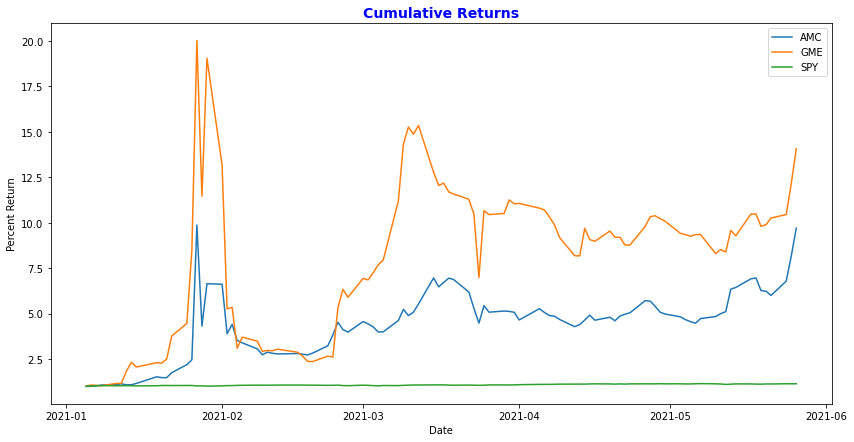

In [6]:
cumulative_returns = (1 + meme_spy_returns).cumprod()
cumulative_returns_plot=cumulative_returns.plot(figsize=(14, 7), xlabel="Date", ylabel="Percent Return")
cumulative_returns_plot.set_title('Cumulative Returns', fontsize=14, fontweight="bold", color="blue") 

Text(0.5, 1.0, 'Risk Comparison')

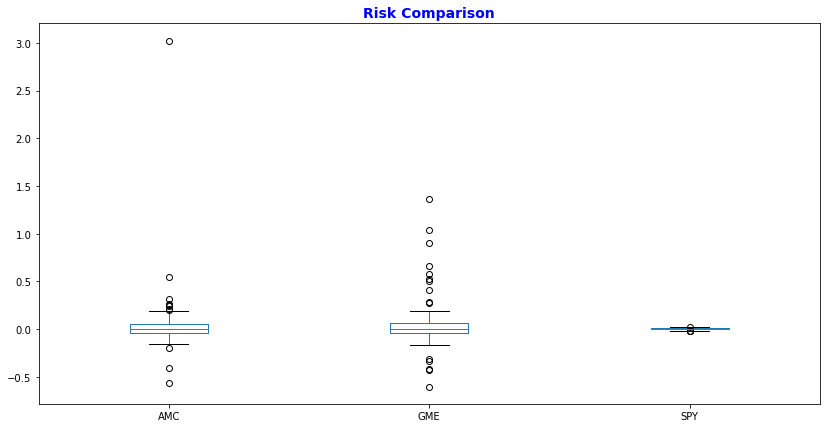

In [7]:
risk_plot=meme_spy_returns.plot.box(figsize=(14, 7))
risk_plot.set_title('Risk Comparison', fontsize=14, fontweight="bold", color="blue") 

In [34]:
meme_spy_returns.std()

AMC    0.329059
GME    0.258435
SPY    0.009030
dtype: float64

In [35]:
anual_std = meme_spy_returns.std() * np.sqrt(252)
anual_std

AMC    5.223645
GME    4.102531
SPY    0.143349
dtype: float64

In [37]:
sharpe_ratios = (meme_spy_returns.mean() * 252) / (meme_spy_returns.std() * np.sqrt(252))
sharpe_ratios

AMC    2.351388
GME    3.286217
SPY    2.337867
dtype: float64

Text(0.5, 1.0, 'Sharpe Ratios')

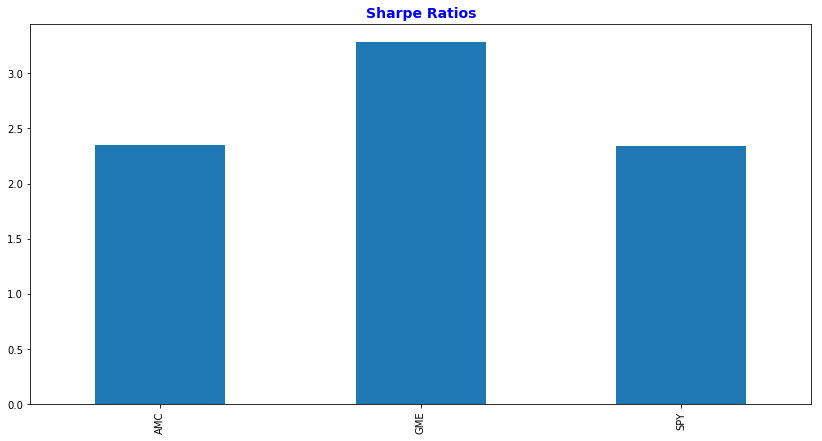

In [61]:
sharpe_ratios_plot=sharpe_ratios.plot(kind="bar", title="Sharpe Ratios", figsize=(14,7))
sharpe_ratios_plot.set_title('Sharpe Ratios', fontsize=14, fontweight="bold", color="blue")

In [62]:
MC_one_year = MCSimulation(
    portfolio_data = meme_stock_df,
    weights = [.33,.33,.33],
    num_simulation = 500,
    num_trading_days = 252 * 1
)


NameError: name 'MCSimulation' is not defined